In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [9]:
DATA_PATH = 'D:\Github\Infrared-Solar-Modules-Classifier\Data/2020-02-14_InfraredSolarModules'
METADATA_PATH = os.path.join(DATA_PATH, 'module_metadata.json')

In [11]:
df = pd.read_json(METADATA_PATH, orient='index').sort_index()
df['image_filepath'] = df.image_filepath.apply(lambda x: os.path.join(DATA_PATH, x))
df

,image_filepath,anomaly_class
0,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
1,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
2,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
3,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
4,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
...,...,...
19995,D:\Github\Infrared-Solar-Modules-Classifier\Da...,No-Anomaly
19996,D:\Github\Infrared-Solar-Modules-Classifier\Da...,No-Anomaly
19997,D:\Github\Infrared-Solar-Modules-Classifier\Da...,No-Anomaly
19998,D:\Github\Infrared-Solar-Modules-Classifier\Da...,No-Anomaly


There's a class imbalance in the data.
But only between anomalies.

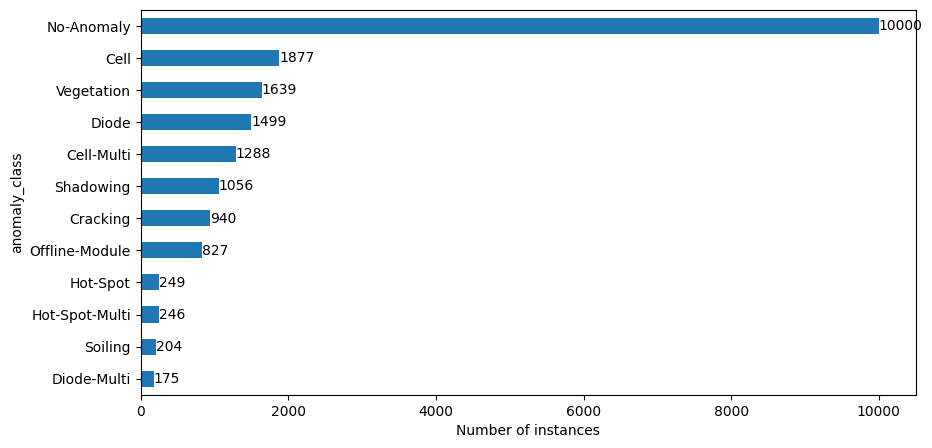

In [13]:
ax = df.anomaly_class.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5))
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

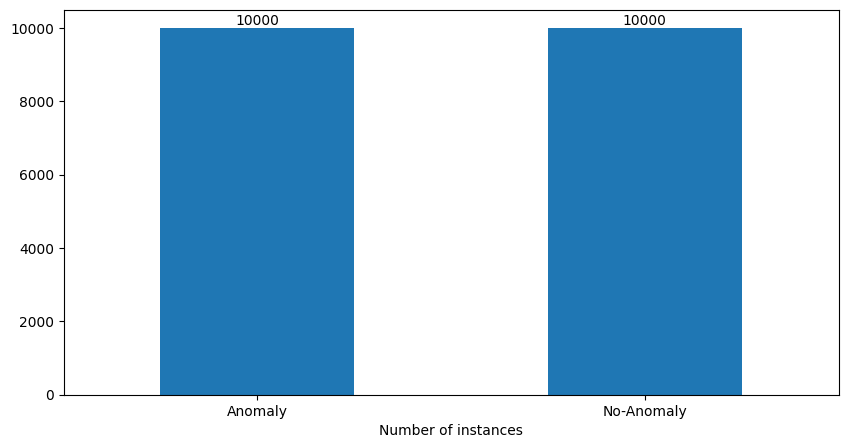

In [14]:
def convert_to_binary(x):
    x = 'Anomaly' if x != 'No-Anomaly' else x
    return x

ax = df.anomaly_class.apply(convert_to_binary).value_counts().plot.bar(figsize=(10,5))
ax.tick_params(labelrotation=0)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [33]:
sample = df.groupby('anomaly_class').sample()
print(sample)
print(sample.iloc[2, 0])

         image_filepath   anomaly_class
6403    images/6403.jpg            Cell
4767    images/4767.jpg      Cell-Multi
7763    images/7763.jpg        Cracking
1766    images/1766.jpg           Diode
895      images/895.jpg     Diode-Multi
6814    images/6814.jpg        Hot-Spot
7923    images/7923.jpg  Hot-Spot-Multi
11198  images/11198.jpg      No-Anomaly
110      images/110.jpg  Offline-Module
2766    images/2766.jpg       Shadowing
8333    images/8333.jpg         Soiling
9516    images/9516.jpg      Vegetation
images/7763.jpg


In [4]:
image_path= DATA_PATH + "/" + sample.iloc[2, 0]
print(image_path)

NameError: name 'DATA_PATH' is not defined

In [38]:
# Cargar el modelo preentrenado VGG16
vgg16 = VGG16(weights='imagenet')

# Cargar y preprocesar la imagen de entrada
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Obtener las características de la imagen
features = vgg16.predict(x)

# Imprimir las dimensiones de las características extraídas
print(features.shape)

1/1 [==============================] - 0s 189ms/step
[[1.17577301e-05 9.46145679e-04 1.11832313e-04 7.66076191e-05
  1.44331294e-04 9.93895737e-05 5.45333896e-05 2.32267179e-04
  9.57027369e-05 2.60185101e-04 4.24835511e-04 7.98737688e-04
  7.98853813e-04 9.99504817e-04 3.42125277e-04 3.62743798e-04
  7.95260654e-04 2.71756668e-04 4.48553765e-04 5.88550989e-04
  2.72560748e-04 2.39592162e-04 2.37339031e-04 2.89870310e-04
  4.16108407e-04 1.13554968e-04 1.98091628e-04 1.43102210e-04
  5.27748562e-05 2.97966326e-04 5.36832158e-05 5.43066475e-04
  7.03125479e-05 7.96773238e-05 7.73856009e-05 8.90901138e-05
  4.40974865e-04 5.57470994e-05 1.07699576e-04 1.84695411e-04
  7.81552691e-04 6.71478774e-05 3.51481605e-04 9.28925219e-05
  2.46777519e-04 3.22675187e-04 1.10079302e-03 3.71414557e-04
  2.12723753e-04 1.38276460e-04 4.42678400e-04 1.25233943e-04
  7.98057299e-05 1.19895631e-04 1.29615277e-04 3.74512922e-04
  1.72812623e-04 2.39769870e-05 1.72514337e-04 5.48639102e-04
  3.96568270e-04 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:


# X: matriz de características ( fila imagen, columna caracteritica)
# y: vector de etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluar la precisión del modelo en los datos de prueba
accuracy = model.score(X_test, y_test)
print("Precisión del modelo:", accuracy)